<a href="https://colab.research.google.com/github/ManojBhuma/Masters-Project-IOT/blob/Master/IoT_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all Required Libraries

In [ ]:
#importing pandas and numpy, datetime
import pandas as pd
import numpy as np
from datetime import datetime
import itertools

# visualization tools
import matplotlib.pyplot as plt

# Train Test Split
from sklearn.model_selection import train_test_split
 
# ML classifier Models, MLP classifier, keras Models
from sklearn.neural_network import MLPClassifier
from keras.utils import np_utils
from keras.models import *
from keras.layers import *

# cross validation and metrics libraries
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

# Randomunder sampler and SMOTE for treating class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# importing os, checkpoint.
import os
from keras.callbacks import ModelCheckpoint




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Mount Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part-1: Collecting Data required:

In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-9-1/conn.log.labeled')
CTU_IoT_Malware_Capture_9_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_9_1 = CTU_IoT_Malware_Capture_9_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_9_1 = CTU_IoT_Malware_Capture_9_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_9_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_9_1.iloc[1][1:]
CTU_IoT_Malware_Capture_9_1 = CTU_IoT_Malware_Capture_9_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_9_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_9_1.shape)
CTU_IoT_Malware_Capture_9_1 = CTU_IoT_Malware_Capture_9_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_9_1

(6378293, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1532510451.648888,CnR6zKxrWbFw26ua7,192.168.100.111,40008,46.28.110.244,123,udp,-,0.004751,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
1,1532511003.118878,CcfURS3zgEMzX0RqTc,192.168.100.102,57849,192.168.100.111,22,tcp,-,108.421563,2376,96,OTH,-,-,0,DAd,5,332,2,200,(empty),Benign,-
2,1532511739.837566,CPhAqD1EhNOoPVA6ha,192.168.100.102,59670,192.168.100.111,22,tcp,-,0.001244,21,0,S0,-,-,0,SAD,3,189,0,0,(empty),Benign,-
3,1532512077.774888,CFr56iYeYk4YZXrPf,192.168.100.102,59701,192.168.100.111,22,tcp,-,0.000738,21,0,S0,-,-,0,SAD,3,189,0,0,(empty),Benign,-
4,1532512335.605565,C8a9xW23hF8nDgeNtj,192.168.100.111,36199,192.168.100.1,53,udp,dns,-,-,-,S0,-,-,0,D,1,58,0,0,(empty),Benign,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378288,1532595195.007148,CIHonx2ymqlX5DqnU2,192.168.100.111,28057,173.94.58.125,23,tcp,-,-,-,-,S0,-,-,0,S,1,40,0,0,(empty),Malicious,PartOfAHorizontalPortScan
6378289,1532594748.215022,CwhtUD3BIdOP5L6Y8g,192.168.100.111,52876,69.196.96.231,23,tcp,-,209.874367,0,0,S1,-,-,0,ShA,8,360,1,44,(empty),Benign,-
6378290,1532591674.249972,CxHWyM2vp5x1mCZmp3,192.168.100.111,39234,192.121.45.63,23,tcp,-,165.760290,0,0,S1,-,-,0,ShA,5,220,1,44,(empty),Benign,-
6378291,1532595145.171589,CtmaRjXW7FOus0sPa,168.102.14.4,11,192.168.100.111,0,icmp,-,-,-,-,OTH,-,-,0,-,1,68,0,0,(empty),Benign,-


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-1-1/conn.log.labeled')
CTU_IoT_Malware_Capture_1_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_1_1 = CTU_IoT_Malware_Capture_1_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_1_1 = CTU_IoT_Malware_Capture_1_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_1_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_1_1.iloc[1][1:]
CTU_IoT_Malware_Capture_1_1  = CTU_IoT_Malware_Capture_1_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_1_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_1_1.shape)
CTU_IoT_Malware_Capture_1_1 = CTU_IoT_Malware_Capture_1_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_1_1.head()

(1008748, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1525879831.015811,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,tcp,-,2.999051,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan
1,1525879831.025055,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan
2,1525879831.045045,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan
3,1525879832.016240,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,tcp,-,2.998796,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan
4,1525879832.024985,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-20-1/conn.log.labeled')
CTU_IoT_Malware_Capture_20_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_20_1 = CTU_IoT_Malware_Capture_20_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_20_1 = CTU_IoT_Malware_Capture_20_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_20_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_20_1.iloc[1][1:]
CTU_IoT_Malware_Capture_20_1  = CTU_IoT_Malware_Capture_20_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_20_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_20_1.shape)
CTU_IoT_Malware_Capture_20_1 = CTU_IoT_Malware_Capture_20_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_20_1.head()

(3209, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1538478769.600293,CSQG794riQ4XnzTxP2,192.168.100.103,37082,192.168.100.1,53,udp,dns,5.005151,78,0,S0,-,-,0,D,2,134,0,0,-,Benign,-
1,1538478779.610847,COTbdG2BhtGBlmf6r,192.168.100.103,34486,192.168.100.1,53,udp,dns,0.007243,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-
2,1538478789.630642,CP48WJ2HOnLuGtr5kb,192.168.100.103,37601,192.168.100.1,53,udp,dns,0.002250,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-
3,1538478779.620088,CeTMJi2TydRSaVdsG4,192.168.100.103,46439,192.168.100.1,53,udp,dns,5.005154,78,0,S0,-,-,0,D,2,134,0,0,-,Benign,-
4,1538478799.645444,CZ6ne24AN9WAg9XA9d,192.168.100.103,55174,192.168.100.1,53,udp,dns,0.002246,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-21-1/conn.log.labeled')
CTU_IoT_Malware_Capture_21_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_21_1 = CTU_IoT_Malware_Capture_21_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_21_1 = CTU_IoT_Malware_Capture_21_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_21_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_21_1.iloc[1][1:]
CTU_IoT_Malware_Capture_21_1  = CTU_IoT_Malware_Capture_21_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_21_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_21_1.shape)
CTU_IoT_Malware_Capture_21_1 = CTU_IoT_Malware_Capture_21_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_21_1.head()


(3286, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1538572953.710599,Cu3Tieri43IPsyBO3,192.168.100.113,42789,192.168.100.1,53,udp,dns,-,-,-,S0,-,-,0,D,1,67,0,0,-,Benign,-
1,1538572958.715995,Cbetl72NeXczaqQ8Lj,192.168.100.113,60546,192.168.100.1,53,udp,dns,0.001494,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-
2,1538572982.666603,CUmQWl2ZA2hrbNtohe,192.168.100.113,37320,192.168.100.1,53,udp,dns,5.005135,78,0,S0,-,-,0,D,2,134,0,0,-,Benign,-
3,1538572992.677145,C9oEZWtG35wx1Mqq5,192.168.100.113,51338,192.168.100.1,53,udp,dns,0.001483,90,90,SF,-,-,0,Dd,2,146,2,146,-,Benign,-
4,1538572992.679377,CbhqpU1oZZyrP7PE6i,192.168.100.113,60088,192.168.100.1,53,udp,dns,5.038625,117,142,SF,-,-,0,Dd,3,201,2,198,-,Benign,-


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-3-1/conn.log.labeled')
CTU_IoT_Malware_Capture_3_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_3_1 = CTU_IoT_Malware_Capture_3_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_3_1 = CTU_IoT_Malware_Capture_3_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_3_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_3_1.iloc[1][1:]
CTU_IoT_Malware_Capture_3_1  = CTU_IoT_Malware_Capture_3_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_3_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_3_1.shape)
CTU_IoT_Malware_Capture_3_1 = CTU_IoT_Malware_Capture_3_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_3_1.head()



(156103, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1526756261.866500,C9YvmJ3zxtuqxWxLW5,192.168.2.5,38792,200.168.87.203,59353,tcp,-,2.998333,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan
1,1526756268.874876,CGsZqZ3UiQexLzPRVb,192.168.2.5,38792,200.168.87.203,59353,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan
2,1526756272.877722,C0LkBW2VEa292Nvet8,192.168.2.5,38793,200.168.87.203,59353,tcp,-,2.997182,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan
3,1526756279.884959,CMDLrn2cVhrqvW8gKa,192.168.2.5,38793,200.168.87.203,59353,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan
4,1526756283.888751,C2UM8f4knuL5Vnvp3h,192.168.2.5,38794,200.168.87.203,59353,tcp,-,2.996286,0,0,S0,-,-,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-34-1/conn.log.labeled')
CTU_IoT_Malware_Capture_34_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_34_1 = CTU_IoT_Malware_Capture_34_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_34_1 = CTU_IoT_Malware_Capture_34_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_34_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_34_1.iloc[1][1:]
CTU_IoT_Malware_Capture_34_1  = CTU_IoT_Malware_Capture_34_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_34_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_34_1.shape)
CTU_IoT_Malware_Capture_34_1 = CTU_IoT_Malware_Capture_34_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_34_1.head()



(23145, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1545403816.962094,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-
1,1545403824.181240,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
2,1545403832.341331,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
3,1545403848.981338,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,-,-,2896,ShADadttcfF,94,5525,96,139044,-,Benign,-
4,1545403850.554283,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-


In [ ]:
import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-42-1/conn.log.labeled')
CTU_IoT_Malware_Capture_42_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_42_1 = CTU_IoT_Malware_Capture_42_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_42_1 = CTU_IoT_Malware_Capture_42_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_42_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_42_1.iloc[1][1:]
CTU_IoT_Malware_Capture_42_1  = CTU_IoT_Malware_Capture_42_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_42_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_42_1.shape)
CTU_IoT_Malware_Capture_42_1 = CTU_IoT_Malware_Capture_42_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_42_1.head()




(4426, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1547127288.026074,CXY5uG2sSmjJ0grfY2,192.168.1.197,58312,104.24.96.120,80,tcp,http,3.909013,83,67212,SF,-,-,4380,ShADadttFf,54,3371,50,69224,-,Malicious,FileDownload
1,1547127288.018828,Ce3AJzwzXwM3Z1XBg,192.168.1.197,45082,104.24.97.120,80,tcp,http,4.767024,150,67212,SF,-,-,0,ShADadttFf,54,2938,50,69224,-,Malicious,C&C-FileDownload
2,1547127292.857808,CJgnSb3XpbbOcMHKUd,192.168.1.197,58316,104.24.96.120,80,tcp,-,3.107228,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-
3,1547127287.987598,Cq43w4aHlsW8nXZ3l,192.168.1.197,59357,192.168.1.1,53,udp,dns,0.029483,58,146,SF,-,-,0,Dd,2,114,2,202,-,Benign,-
4,1547127288.023327,C5uLwl2hGy10y9PSr6,192.168.1.197,39686,192.168.1.1,53,udp,dns,0.001249,58,146,SF,-,-,0,Dd,2,114,2,202,-,Benign,-


In [ ]:

import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-IoT-Malware-Capture-8-1/conn.log.labeled')
CTU_IoT_Malware_Capture_8_1 = pd.read_table(f, sep='    ')
CTU_IoT_Malware_Capture_8_1 = CTU_IoT_Malware_Capture_8_1.iloc[5:-1,:]
CTU_IoT_Malware_Capture_8_1 = CTU_IoT_Malware_Capture_8_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Malware_Capture_8_1.iloc[0][1:]
first_row = CTU_IoT_Malware_Capture_8_1.iloc[1][1:]
CTU_IoT_Malware_Capture_8_1  = CTU_IoT_Malware_Capture_8_1.iloc[2:,:-1]
CTU_IoT_Malware_Capture_8_1.columns = list(column_names.values)
print(CTU_IoT_Malware_Capture_8_1.shape)
CTU_IoT_Malware_Capture_8_1 = CTU_IoT_Malware_Capture_8_1.reset_index(drop=True)
CTU_IoT_Malware_Capture_8_1.head()


(10403, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1533042911.474174,C5JLGOoxIw2dBZt47,192.168.100.113,123,81.2.254.224,123,udp,-,0.005490,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
1,1533042921.474234,Cf3cHf4jZr9nvD808i,192.168.100.113,123,147.231.100.5,123,udp,-,0.001741,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
2,1533042944.474388,CJgmSt3bSY6XwE9fzc,192.168.100.113,123,31.31.74.35,123,udp,-,0.004495,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
3,1533042976.474182,Cav32m4csR3OZYhShj,192.168.100.113,123,147.251.48.140,123,udp,-,0.006988,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-
4,1533042988.474356,ClwPfA40tU9UT4nksg,192.168.100.113,123,147.231.100.5,123,udp,-,0.001487,48,48,SF,-,-,0,Dd,1,76,1,76,(empty),Benign,-


In [ ]:
HoneypotCapture41 = ('/content/drive/MyDrive/BigDatasets/CTU-Honeypot-Capture-4-1/bro/conn.log.labeled')
f = open(HoneypotCapture41)
CTU_IoT_Honeypot_Capture_4_1 = pd.read_table(f, sep='    ')
CTU_IoT_Honeypot_Capture_4_1 = CTU_IoT_Honeypot_Capture_4_1.iloc[5:-1,:]
CTU_IoT_Honeypot_Capture_4_1 = CTU_IoT_Honeypot_Capture_4_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Honeypot_Capture_4_1.iloc[0][1:]
first_row = CTU_IoT_Honeypot_Capture_4_1.iloc[1][1:]
CTU_IoT_Honeypot_Capture_4_1  = CTU_IoT_Honeypot_Capture_4_1.iloc[2:,:-1]
CTU_IoT_Honeypot_Capture_4_1.columns = list(column_names.values)
print(CTU_IoT_Honeypot_Capture_4_1.shape)
CTU_IoT_Honeypot_Capture_4_1 = CTU_IoT_Honeypot_Capture_4_1.reset_index(drop=True)
CTU_IoT_Honeypot_Capture_4_1.head()

(452, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1540469302.538640,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,48,SF,-,-,0,Dd,1,76,1,76,-,benign,-
1,1540469197.400159,CnaDAG3n5r8eiG4su2,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,0,S0,-,-,0,D,24,8208,0,0,-,benign,-
2,1540469385.734089,CUrxU238nt0m6yTgKf,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,48,SF,-,-,0,Dd,1,76,1,76,-,benign,-
3,1540469831.302625,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,0,SF,-,-,0,ShAFf,5,212,3,144,-,benign,-
4,1540469831.265405,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,311,SF,-,-,0,Dd,1,62,1,339,-,benign,-


In [ ]:

import pandas as pd
f = open('/content/drive/MyDrive/BigDatasets/CTU-Honeypot-Capture-5-1/bro/conn.log.labeled')
CTU_IoT_Honeypot_Capture_5_1 = pd.read_table(f, sep='    ')
CTU_IoT_Honeypot_Capture_5_1 = CTU_IoT_Honeypot_Capture_5_1.iloc[5:-1,:]
CTU_IoT_Honeypot_Capture_5_1 = CTU_IoT_Honeypot_Capture_5_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Honeypot_Capture_5_1.iloc[0][1:]
first_row = CTU_IoT_Honeypot_Capture_5_1.iloc[1][1:]
CTU_IoT_Honeypot_Capture_5_1  = CTU_IoT_Honeypot_Capture_5_1.iloc[2:,:-1]
CTU_IoT_Honeypot_Capture_5_1.columns = list(column_names.values)
print(CTU_IoT_Honeypot_Capture_5_1.shape)
CTU_IoT_Honeypot_Capture_5_1 = CTU_IoT_Honeypot_Capture_5_1.reset_index(drop=True)
CTU_IoT_Honeypot_Capture_5_1.head()


(1374, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1537522822.965530,CJAF5z3MDFg4XVDXB,0.0.0.0,68,255.255.255.255,67,udp,dhcp,8.322388,600,0,S0,-,-,0,D,2,656,0,0,-,benign,-
1,1537522897.732295,CcYEFX3Qj9xdNX1ZCa,192.168.2.1,5353,224.0.0.251,5353,udp,dns,-,-,-,S0,-,-,0,D,1,391,0,0,-,benign,-
2,1537522897.732374,CF6fCK1nFqvI1XxGM1,fe80::80e6:50ff:fe12:1464,5353,ff02::fb,5353,udp,dns,-,-,-,S0,-,-,0,D,1,411,0,0,-,benign,-
3,1537522897.732507,C2dlio3MkdwWJ80y04,169.254.15.115,5353,224.0.0.251,5353,udp,dns,-,-,-,S0,-,-,0,D,1,391,0,0,-,benign,-
4,1537522899.498805,COrF0t2uLErai9nfH5,0.0.0.0,68,255.255.255.255,67,udp,dhcp,60.555587,3000,0,S0,-,-,0,D,10,3280,0,0,-,benign,-


In [ ]:
HoneypotCapture71 = ('/content/drive/MyDrive/BigDatasets/CTU-Honeypot-Capture-7-1/Somfy-01/bro/conn.log.labeled')
f = open(HoneypotCapture71)
CTU_IoT_Honeypot_Capture_7_1 = pd.read_table(f, sep='    ')
CTU_IoT_Honeypot_Capture_7_1 = CTU_IoT_Honeypot_Capture_7_1.iloc[5:-1,:]
CTU_IoT_Honeypot_Capture_7_1 = CTU_IoT_Honeypot_Capture_7_1.iloc[:,0].str.split(expand=True)
column_names = CTU_IoT_Honeypot_Capture_7_1.iloc[0][1:]
first_row = CTU_IoT_Honeypot_Capture_7_1.iloc[1][1:]
CTU_IoT_Honeypot_Capture_7_1  = CTU_IoT_Honeypot_Capture_7_1.iloc[2:,:-1]
CTU_IoT_Honeypot_Capture_7_1.columns = list(column_names.values)
print(CTU_IoT_Honeypot_Capture_7_1.shape)
CTU_IoT_Honeypot_Capture_7_1 = CTU_IoT_Honeypot_Capture_7_1.reset_index(drop=True)
CTU_IoT_Honeypot_Capture_7_1.head()

(130, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1562159819.172195,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,dhcp,30.004642,8768,0,S0,-,-,0,D,16,9216,0,0,-,benign,-
1,1562159849.173340,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,dhcp,0.004564,0,3900,SHR,-,-,0,^d,0,0,13,4264,-,benign,-
2,1562159953.959669,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.948539,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
3,1562159998.302954,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.768179,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
4,1562160024.472592,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,dns,0.000114,451,0,S0,-,-,0,D,11,979,0,0,-,benign,-


In [ ]:
data = pd.concat([CTU_IoT_Honeypot_Capture_7_1,
                  CTU_IoT_Honeypot_Capture_5_1,
                  CTU_IoT_Honeypot_Capture_4_1,
                  CTU_IoT_Malware_Capture_1_1, 
                  CTU_IoT_Malware_Capture_3_1,
                  CTU_IoT_Malware_Capture_8_1,
                  CTU_IoT_Malware_Capture_9_1,
                  CTU_IoT_Malware_Capture_20_1,
                  CTU_IoT_Malware_Capture_21_1, 
                  CTU_IoT_Malware_Capture_34_1, 
                  CTU_IoT_Malware_Capture_42_1])
print(data.shape)
data.head()

(7589569, 23)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1562159819.172195,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,dhcp,30.004642,8768,0,S0,-,-,0,D,16,9216,0,0,-,benign,-
1,1562159849.173340,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,dhcp,0.004564,0,3900,SHR,-,-,0,^d,0,0,13,4264,-,benign,-
2,1562159953.959669,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.948539,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
3,1562159998.302954,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.768179,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
4,1562160024.472592,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,dns,0.000114,451,0,S0,-,-,0,D,11,979,0,0,-,benign,-


In [ ]:

data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7589569 entries, 0 to 4425
Data columns (total 23 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ts              object
 1   uid             object
 2   id.orig_h       object
 3   id.orig_p       object
 4   id.resp_h       object
 5   id.resp_p       object
 6   proto           object
 7   service         object
 8   duration        object
 9   orig_bytes      object
 10  resp_bytes      object
 11  conn_state      object
 12  local_orig      object
 13  local_resp      object
 14  missed_bytes    object
 15  history         object
 16  orig_pkts       object
 17  orig_ip_bytes   object
 18  resp_pkts       object
 19  resp_ip_bytes   object
 20  tunnel_parents  object
 21  label           object
 22  detailed-label  object
dtypes: object(23)
memory usage: 1.4+ GB


In [ ]:
# Dropping 'ts' Date column.
data = data.iloc[:,1:]
data

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,dhcp,30.004642,8768,0,S0,-,-,0,D,16,9216,0,0,-,benign,-
1,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,dhcp,0.004564,0,3900,SHR,-,-,0,^d,0,0,13,4264,-,benign,-
2,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.948539,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
3,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.768179,876,0,S0,-,-,0,D,6,1164,0,0,-,benign,-
4,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,dns,0.000114,451,0,S0,-,-,0,D,11,979,0,0,-,benign,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,Cg18Jr15pQhdJUELL4,192.168.1.197,123,82.113.53.40,123,udp,-,-,-,-,S0,-,-,0,D,1,76,0,0,-,Benign,-
4422,CF56fv3yDg2vRnegKa,192.168.1.197,123,89.221.214.130,123,udp,-,0.003995,48,48,SF,-,-,0,Dd,1,76,1,76,-,Benign,-
4423,Ccvd9l4NjDPEkD1nRd,192.168.1.197,123,81.2.248.189,123,udp,-,0.005252,48,48,SF,-,-,0,Dd,1,76,1,76,-,Benign,-
4424,C07GbT1HxlFUEjwiNh,185.244.25.183,4975,192.168.1.197,50516,tcp,-,30007.122211,8499,8025,OTH,-,-,0,DdAa,654,42791,348,26493,-,Benign,-


# Part-2: Data Cleaning:

Inspecting Data:

In [ ]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7589569 entries, 0 to 4425
Data columns (total 22 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   uid             object
 1   id.orig_h       object
 2   id.orig_p       object
 3   id.resp_h       object
 4   id.resp_p       object
 5   proto           object
 6   service         object
 7   duration        object
 8   orig_bytes      object
 9   resp_bytes      object
 10  conn_state      object
 11  local_orig      object
 12  local_resp      object
 13  missed_bytes    object
 14  history         object
 15  orig_pkts       object
 16  orig_ip_bytes   object
 17  resp_pkts       object
 18  resp_ip_bytes   object
 19  tunnel_parents  object
 20  label           object
 21  detailed-label  object
dtypes: object(22)
memory usage: 1.3+ GB


In [ ]:
# Missing NaN Values Check
100*(data.isnull().sum()/len(data))

uid               0.0
id.orig_h         0.0
id.orig_p         0.0
id.resp_h         0.0
id.resp_p         0.0
proto             0.0
service           0.0
duration          0.0
orig_bytes        0.0
resp_bytes        0.0
conn_state        0.0
local_orig        0.0
local_resp        0.0
missed_bytes      0.0
history           0.0
orig_pkts         0.0
orig_ip_bytes     0.0
resp_pkts         0.0
resp_ip_bytes     0.0
tunnel_parents    0.0
label             0.0
detailed-label    0.0
dtype: float64

Handling Missing Values:

In [ ]:
print('Checking if any ip addresses in "id.orig_h, id.resp_h" are missing shown by "::"')
flag1=0
flag2=0
for i in data['id.orig_h'].value_counts().index:
  if('::'==i):
    flag1=1
for i in data['id.resp_h'].value_counts().index:
  if('::'==i):
    flag2=1

    
if(flag1==1):
  print('id.orig_h has missing ip addresses')
else:
  print('id.orig_h has No missing ip addresses')
if(flag2==1):
  print('id.resp_h has missing ip addresses')
else:
  print('id.resp_h has No missing ip addresses')

Checking if any ip addresses in "id.orig_h, id.resp_h" are missing shown by "::"
id.orig_h has missing ip addresses
id.resp_h has No missing ip addresses


In [ ]:
# Missing Data replacement
blank_data_columns = []
print('Columns that contain blank data i.e., "-"  are:')
for i,j in enumerate(data):
  if (('-' in str(data[j].value_counts().index))):
      blank_data_columns.append(j)
blank_data_columns


Columns that contain blank data i.e., "-"  are:


['service',
 'duration',
 'orig_bytes',
 'resp_bytes',
 'local_orig',
 'local_resp',
 'history',
 'tunnel_parents',
 'detailed-label']

In [ ]:
print('Missing Data present as blanks i.e., "-" :')
for i in blank_data_columns:
  print(i,':',100*(data[i].value_counts()['-']/len(data)))

print('\n')
print('missing Data Present as "::" are: ')
for i in ['id.orig_h']:
  print(i,':',100*(data[i].value_counts()['::']/len(data)))

Missing Data present as blanks i.e., -:
service : 99.76702234342952
duration : 95.64800056498596
orig_bytes : 95.64800056498596
resp_bytes : 95.64800056498596
local_orig : 100.0
local_resp : 100.0
history : 0.2822821691192214
tunnel_parents : 0.4746251071701173
detailed-label : 6.7632826053758786


missing Data Present as "::" are: 
id.orig_h : 0.0003952793630310232


In [ ]:
data['tunnel_parents'].value_counts()

(empty)    7553547
-            36022
Name: tunnel_parents, dtype: int64

In [ ]:
# Dropping columns with more than 95% Missing data:
required_columns = []
for i,j in enumerate(data):
  if(j not in blank_data_columns[:-3]):
    required_columns.append(j)
  
required_columns


['uid',
 'id.orig_h',
 'id.orig_p',
 'id.resp_h',
 'id.resp_p',
 'proto',
 'conn_state',
 'missed_bytes',
 'history',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes',
 'tunnel_parents',
 'label',
 'detailed-label']

In [ ]:
# Dropping Missing Data columns with more than 95%
data = data.loc[:,required_columns]
data.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,S0,0,D,16,9216,0,0,-,benign,-
1,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,SHR,0,^d,0,0,13,4264,-,benign,-
2,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,-,benign,-
3,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,-,benign,-
4,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,S0,0,D,11,979,0,0,-,benign,-


In [ ]:
mode_value_id_orig_h = data['id.orig_h'].mode().values
mode_value_id_orig_h

array(['192.168.100.111'], dtype=object)

In [ ]:
data.loc[data['id.orig_h']=='::','id.orig_h'] = '192.168.100.111'

In [ ]:
mode_value_history = data['history'].mode().values
mode_value_history

array(['S'], dtype=object)

In [ ]:
data.loc[data['history']=='-','history'] = 'S'

In [ ]:
mode_value_tunnel_parents = data['tunnel_parents'].mode().values
mode_value_tunnel_parents

array(['(empty)'], dtype=object)

In [ ]:
data.loc[data['tunnel_parents']=='-','tunnel_parents'] = '(empty)'

In [ ]:
mode_value_detailed_label = data['detailed-label'].mode().values
mode_value_detailed_label

array(['PartOfAHorizontalPortScan'], dtype=object)

In [ ]:
data.loc[data['detailed-label']=='-','detailed-label'] = 'PartOfAHorizontalPortScan'

In [ ]:
data.to_csv('IoT_23_preprcessed_data.csv')

In [ ]:
import shutil
shutil.move('/content/IoT_23_preprcessed_data.csv','/content/drive/MyDrive/BigDatasets' )

'/content/drive/MyDrive/BigDatasets/IoT_23_preprcessed_data.csv'

# Part-3: Correcting Target Labels:

Loading Cleaned Dataset:

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/BigDatasets/IoT_23_preprcessed_data.csv', index_col = 'uid')
data = data.iloc[:,1:]
data.head()


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
uid,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,S0,0,D,16,9216,0,0,(empty),benign,PartOfAHorizontalPortScan
CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,SHR,0,^d,0,0,13,4264,(empty),benign,PartOfAHorizontalPortScan
CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,(empty),benign,PartOfAHorizontalPortScan
C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,(empty),benign,PartOfAHorizontalPortScan
CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,S0,0,D,11,979,0,0,(empty),benign,PartOfAHorizontalPortScan


In [ ]:
data.loc[data['label']=='Benign','label'].values

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [ ]:
data.loc[data['label']=='benign','label'].values

array(['benign', 'benign', 'benign', ..., 'benign', 'benign', 'benign'],
      dtype=object)

In [ ]:
data.loc[data['label']=='Benign','detailed-label']

uid
CfHl9r3XMYtDQRrHnh    PartOfAHorizontalPortScan
C7USrA15nFVkniMqC5    PartOfAHorizontalPortScan
C3ajsm4byxMkPys9Wa    PartOfAHorizontalPortScan
Cahg1h1asfICn0Hp5l    PartOfAHorizontalPortScan
ChQ6aR2J1wAhkqaml8    PartOfAHorizontalPortScan
                                ...            
Cg18Jr15pQhdJUELL4    PartOfAHorizontalPortScan
CF56fv3yDg2vRnegKa    PartOfAHorizontalPortScan
Ccvd9l4NjDPEkD1nRd    PartOfAHorizontalPortScan
C07GbT1HxlFUEjwiNh    PartOfAHorizontalPortScan
Cb4VXV3tOHGjcsI0cf    PartOfAHorizontalPortScan
Name: detailed-label, Length: 511348, dtype: object

In [ ]:
data.loc[data['label']=='benign','detailed-label']

uid
CUg3u41D8SwgQw1Job    PartOfAHorizontalPortScan
CUpk9Y381SJuOHyK2d    PartOfAHorizontalPortScan
CC5CQA3Ptzma7a0by4    PartOfAHorizontalPortScan
C3sgcmfvNzjNoY0Kd     PartOfAHorizontalPortScan
CJVaCgoBTEsu0jjDi     PartOfAHorizontalPortScan
                                ...            
CaITg437HfJAXTXZ44    PartOfAHorizontalPortScan
ChD10Y1fVGrFvMpD6g    PartOfAHorizontalPortScan
Caxyou4MZpRXfDBG8h    PartOfAHorizontalPortScan
CkHQfG3B034MyvP3W     PartOfAHorizontalPortScan
ClZeN63S7LbgEs2ZNk    PartOfAHorizontalPortScan
Name: detailed-label, Length: 1956, dtype: object

In [ ]:
# Correcting Benign Label:
data.loc[data['label']=='Benign','detailed-label'] = 'Benign'
data.loc[data['label']=='benign','detailed-label'] = 'Benign'
data.drop(['label'], axis=1, inplace=True)
data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,detailed-label
uid,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,S0,0,D,16,9216,0,0,(empty),Benign
CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,SHR,0,^d,0,0,13,4264,(empty),Benign
CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,(empty),Benign
C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,S0,0,D,6,1164,0,0,(empty),Benign
CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,S0,0,D,11,979,0,0,(empty),Benign


# Part-3: Data Visualizations:

- **Graphs for frequency of different categories in respective columns:** Y axis is the number of occurance whereas X axis show the variety of data in respective columns

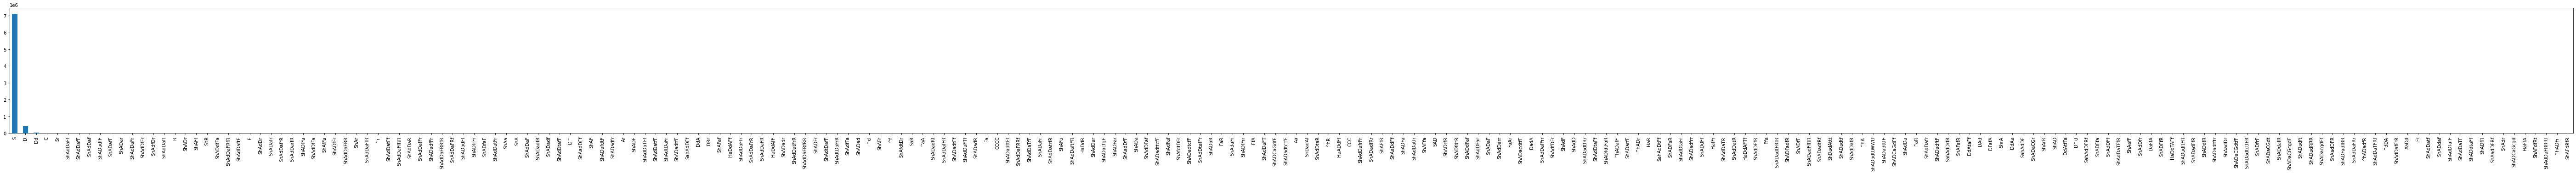

In [ ]:
plt.figure(figsize=(100,5))
data['history'].value_counts().plot(kind='bar')
plt.show()

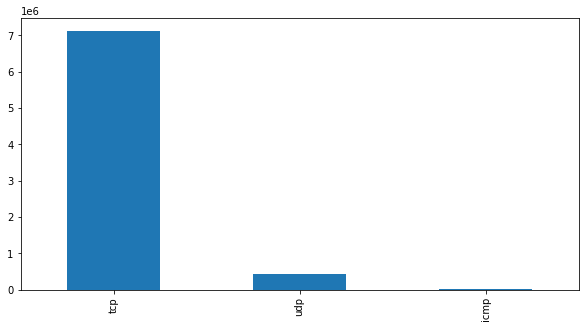

In [ ]:
plt.figure(figsize=(10,5))
data['proto'].value_counts().plot(kind='bar')
plt.show()

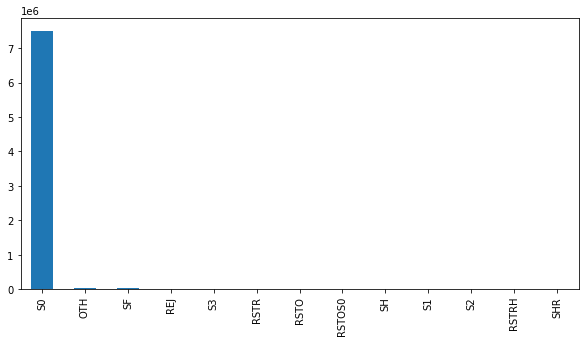

In [ ]:
plt.figure(figsize=(10,5))
data['conn_state'].value_counts().plot(kind='bar')
plt.show()

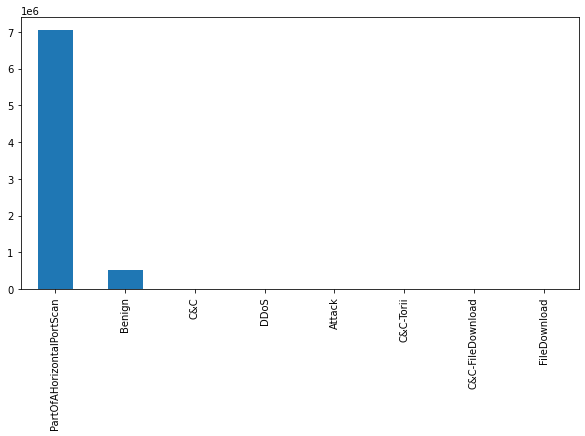

In [ ]:
plt.figure(figsize=(10,5))
data['detailed-label'].value_counts().plot(kind='bar')
plt.show()

- Visualizing the data all in one:

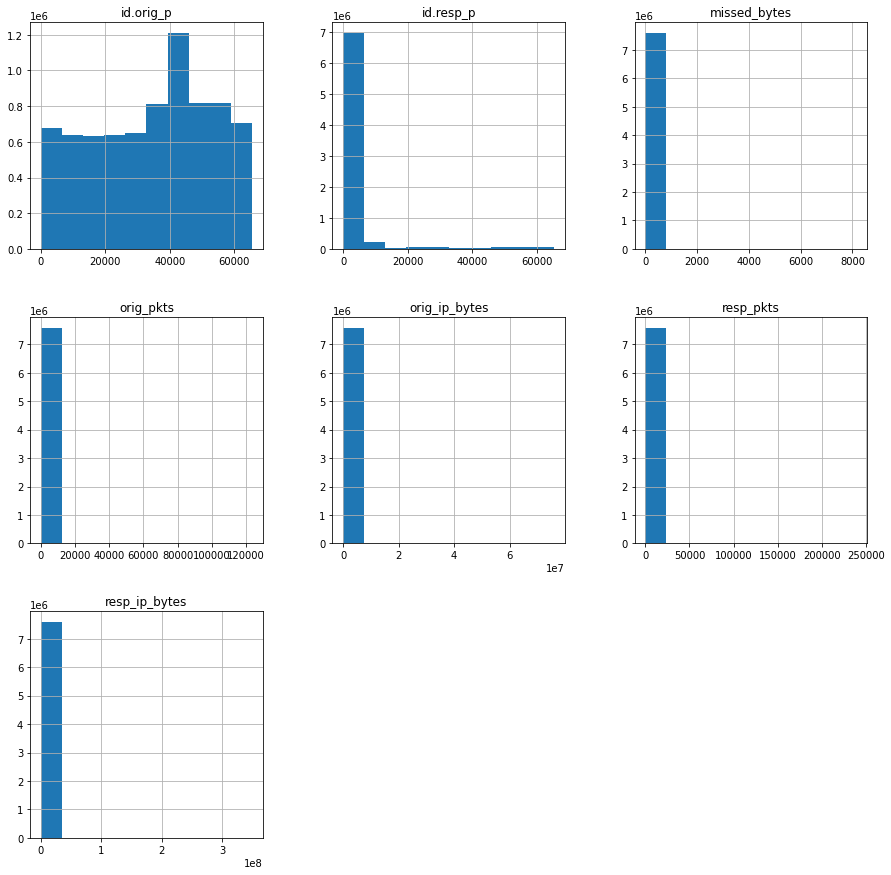

In [ ]:
data.hist(figsize=(15,15))
plt.show()

# Part-4: Feature Extraction by Encoding:

In [ ]:
training_columns = list(data.columns)
training_columns

['id.orig_h',
 'id.orig_p',
 'id.resp_h',
 'id.resp_p',
 'proto',
 'conn_state',
 'missed_bytes',
 'history',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes',
 'tunnel_parents',
 'detailed-label']

In [ ]:
# Categorical Columns:
data.loc[:,[ 'id.orig_h', 'id.resp_h', 'proto','conn_state', 'history'] ]

,id.orig_h,id.resp_h,proto,conn_state,history
uid,,,,,
CUg3u41D8SwgQw1Job,0.0.0.0,255.255.255.255,udp,S0,D
CUpk9Y381SJuOHyK2d,255.255.255.255,192.168.1.1,udp,SHR,^d
CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,ff02::fb,udp,S0,D
C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,ff02::fb,udp,S0,D
CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,ff02::fb,udp,S0,D
...,...,...,...,...,...
Cg18Jr15pQhdJUELL4,192.168.1.197,82.113.53.40,udp,S0,D
CF56fv3yDg2vRnegKa,192.168.1.197,89.221.214.130,udp,SF,Dd
Ccvd9l4NjDPEkD1nRd,192.168.1.197,81.2.248.189,udp,SF,Dd


In [ ]:
print('Total Categories Present in id.Orig_h:',len(data['id.orig_h'].value_counts()))
orig_h_value_counts = data['id.orig_h'].value_counts()
orig_h_value_counts

Total Categories Present in id.Orig_h: 18171


192.168.100.111    6375659
192.168.100.103     994268
192.168.2.5         154886
192.168.1.195        23144
192.168.100.113      13685
                    ...   
14.93.130.144            1
188.14.19.203            1
172.2.28.185             1
4.14.114.46              1
172.125.4.1              1
Name: id.orig_h, Length: 18171, dtype: int64

In [ ]:
print('Total Categories Present in id.resp_h:',len(data['id.resp_h'].value_counts()))
resp_h_value_counts = data['id.resp_h'].value_counts()
resp_h_value_counts

Total Categories Present in id.resp_h: 5879170


200.168.87.203     23295
192.168.100.103    17689
123.59.209.185     14260
185.244.25.235      6771
147.231.100.5       6719
                   ...  
120.21.184.132         1
98.122.146.215         1
210.142.100.213        1
186.140.122.253        1
32.180.41.235          1
Name: id.resp_h, Length: 5879170, dtype: int64

In [ ]:
print('Total Categories Present in proto:',len(data['proto'].value_counts()))
proto_value_counts = data['proto'].value_counts()
proto_value_counts

Total Categories Present in proto: 3


tcp     7129790
udp      438355
icmp      21424
Name: proto, dtype: int64

In [ ]:
print('Total Categories Present in conn_state:',len(data['conn_state'].value_counts()))
conn_state_value_counts = data['conn_state'].value_counts()
conn_state_value_counts

Total Categories Present in conn_state: 13


S0        7506011
OTH         35720
SF          31822
REJ         10738
S3           2484
RSTR         1808
RSTO          373
RSTOS0        201
SH            143
S1             90
S2             85
RSTRH          79
SHR            15
Name: conn_state, dtype: int64

In [ ]:
print('Total Categories Present in history:',len(data['history'].value_counts()))
history_value_counts = data['history'].value_counts()
history_value_counts

Total Categories Present in history: 240


S            7106976
D             420434
Dd             17891
C              14252
Sr             10737
              ...   
ShAdDafR           1
ShAdDFf            1
ShADarfF           1
ShAdDtaFf          1
ShADdafR           1
Name: history, Length: 240, dtype: int64

In [ ]:
print('Total Categories Present in tunnel_parents:',len(data['tunnel_parents'].value_counts()))
tunnel_parents_value_counts = data['tunnel_parents'].value_counts()
tunnel_parents_value_counts

Total Categories Present in tunnel_parents: 1


(empty)    7589569
Name: tunnel_parents, dtype: int64

In [ ]:
print('Total Categories Present in detailed-label:',len(data['detailed-label'].value_counts()))
detailed_label_value_counts = data['detailed-label'].value_counts()
detailed_label_value_counts

Total Categories Present in detailed-label: 8


PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
FileDownload                       3
C&C-FileDownload                   3
Name: detailed-label, dtype: int64

In [ ]:
proto_dummies = pd.get_dummies(data['proto'],drop_first=True, prefix='proto')
proto_dummies

,proto_tcp,proto_udp
uid,,
CUg3u41D8SwgQw1Job,0,1
CUpk9Y381SJuOHyK2d,0,1
CC5CQA3Ptzma7a0by4,0,1
C3sgcmfvNzjNoY0Kd,0,1
CJVaCgoBTEsu0jjDi,0,1
...,...,...
Cg18Jr15pQhdJUELL4,0,1
CF56fv3yDg2vRnegKa,0,1
Ccvd9l4NjDPEkD1nRd,0,1


In [ ]:
conn_state_dummies = pd.get_dummies(data['conn_state'],drop_first=True, prefix = 'conn_state')
conn_state_dummies

,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Cg18Jr15pQhdJUELL4,0,0,0,0,0,1,0,0,0,0,0,0
CF56fv3yDg2vRnegKa,0,0,0,0,0,0,0,0,0,1,0,0
Ccvd9l4NjDPEkD1nRd,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_history = OrdinalEncoder()
history_encoded = encoder_history.fit_transform(pd.DataFrame(data['history']))
history_encoded = pd.DataFrame(history_encoded)
history_encoded

,0
0,6.0
1,230.0
2,6.0
3,6.0
4,6.0
...,...
7589564,6.0
7589565,14.0
7589566,14.0
7589567,16.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_orig_h = OrdinalEncoder()
orig_h_encoded = encoder_orig_h.fit_transform(pd.DataFrame(data['id.orig_h']))
orig_h_encoded = pd.DataFrame(orig_h_encoded)
orig_h_encoded

,0
0,0.0
1,11571.0
2,18166.0
3,18166.0
4,18165.0
...,...
7589564,7614.0
7589565,7614.0
7589566,7614.0
7589567,6577.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_resp_h = OrdinalEncoder()
resp_h_encoded = encoder_resp_h.fit_transform(pd.DataFrame(data['id.resp_h']))
resp_h_encoded = pd.DataFrame(resp_h_encoded)
resp_h_encoded

,0
0,3871516.0
1,2836028.0
2,5879169.0
3,5879169.0
4,5879169.0
...,...
7589564,5351674.0
7589565,5559316.0
7589566,5333956.0
7589567,2836031.0


In [ ]:
data['id.orig_h'] = orig_h_encoded.values
data['id.resp_h'] = resp_h_encoded.values
data['history'] = history_encoded.values
data.drop(['proto',  'conn_state'],axis=1, inplace=True)
data = pd.concat([data, proto_dummies,conn_state_dummies], axis = 1)
data.head()


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,detailed-label,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0.0,68,3871516.0,67,0,6.0,16,9216,0,0,(empty),Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,11571.0,68,2836028.0,67,0,230.0,0,0,13,4264,(empty),Benign,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,18166.0,5353,5879169.0,5353,0,6.0,6,1164,0,0,(empty),Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,18166.0,5353,5879169.0,5353,0,6.0,6,1164,0,0,(empty),Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,18165.0,5353,5879169.0,5353,0,6.0,11,979,0,0,(empty),Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = data.drop(['tunnel_parents', 'detailed-label'], axis=1)
y = data[['detailed-label']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7589569 entries, CUg3u41D8SwgQw1Job to Cb4VXV3tOHGjcsI0cf
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id.orig_h          float64
 1   id.orig_p          int64  
 2   id.resp_h          float64
 3   id.resp_p          int64  
 4   missed_bytes       int64  
 5   history            float64
 6   orig_pkts          int64  
 7   orig_ip_bytes      int64  
 8   resp_pkts          int64  
 9   resp_ip_bytes      int64  
 10  proto_tcp          uint8  
 11  proto_udp          uint8  
 12  conn_state_REJ     uint8  
 13  conn_state_RSTO    uint8  
 14  conn_state_RSTOS0  uint8  
 15  conn_state_RSTR    uint8  
 16  conn_state_RSTRH   uint8  
 17  conn_state_S0      uint8  
 18  conn_state_S1      uint8  
 19  conn_state_S2      uint8  
 20  conn_state_S3      uint8  
 21  conn_state_SF      uint8  
 22  conn_state_SH      uint8  
 23  conn_state_SHR     uint8  
dtypes: float64(3), int64(7), ui

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7589569 entries, CUg3u41D8SwgQw1Job to Cb4VXV3tOHGjcsI0cf
Data columns (total 1 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   detailed-label  object
dtypes: object(1)
memory usage: 115.8+ MB


In [ ]:
y.value_counts()

detailed-label           
PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
FileDownload                       3
C&C-FileDownload                   3
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_y = OrdinalEncoder()
y_encoded = encoder_y.fit_transform(pd.DataFrame(y))
y_encoded = pd.DataFrame(y_encoded)
y_encoded.index = y.index
y_encoded.columns= ['detailed-label']
y_encoded

,detailed-label
uid,
CUg3u41D8SwgQw1Job,1.0
CUpk9Y381SJuOHyK2d,1.0
CC5CQA3Ptzma7a0by4,1.0
C3sgcmfvNzjNoY0Kd,1.0
CJVaCgoBTEsu0jjDi,1.0
...,...
Cg18Jr15pQhdJUELL4,1.0
CF56fv3yDg2vRnegKa,1.0
Ccvd9l4NjDPEkD1nRd,1.0


In [ ]:
data_encoded = pd.concat([X,y_encoded],axis=1)
data_encoded

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,detailed-label
uid,,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,0.0,68,3871516.0,67,0,6.0,16,9216,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
CUpk9Y381SJuOHyK2d,11571.0,68,2836028.0,67,0,230.0,0,0,13,4264,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0
CC5CQA3Ptzma7a0by4,18166.0,5353,5879169.0,5353,0,6.0,6,1164,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
C3sgcmfvNzjNoY0Kd,18166.0,5353,5879169.0,5353,0,6.0,6,1164,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
CJVaCgoBTEsu0jjDi,18165.0,5353,5879169.0,5353,0,6.0,11,979,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cg18Jr15pQhdJUELL4,7614.0,123,5351674.0,123,0,6.0,1,76,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0
CF56fv3yDg2vRnegKa,7614.0,123,5559316.0,123,0,14.0,1,76,1,76,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
Ccvd9l4NjDPEkD1nRd,7614.0,123,5333956.0,123,0,14.0,1,76,1,76,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0


# Part-5: Feature Selection with correlation, CHI squared plot

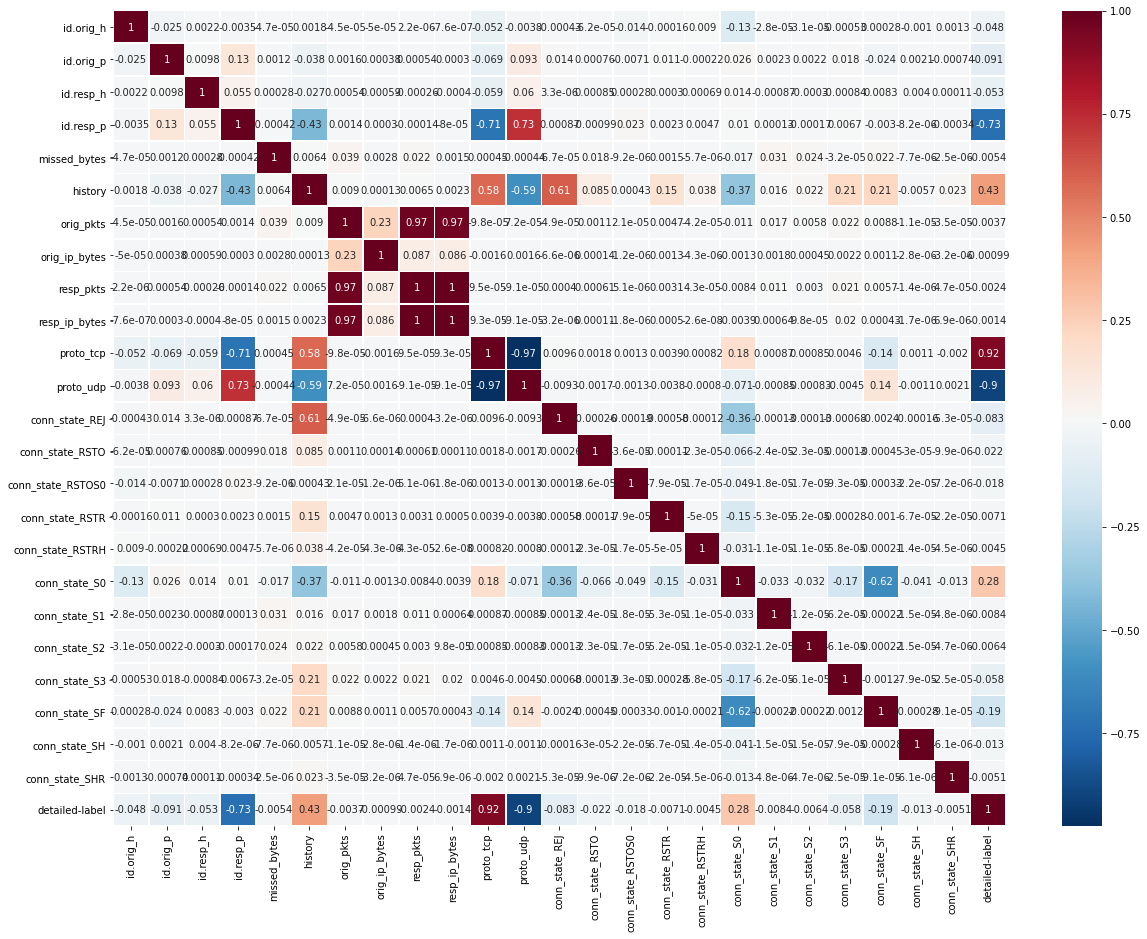

In [ ]:
corr_data = data_encoded.corr(method='pearson')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))

sns.heatmap(corr_data, 
            xticklabels=corr_data.columns,
            yticklabels=corr_data.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
help(chi2)

Help on function chi2 in module sklearn.feature_selection._univariate_selection:

chi2(X, y)
    Compute chi-squared stats between each non-negative feature and class.
    
    This score can be used to select the n_features features with the
    highest values for the test chi-squared statistic from X, which must
    contain only non-negative features such as booleans or frequencies
    (e.g., term counts in document classification), relative to the classes.
    
    Recall that the chi-square test measures dependence between stochastic
    variables, so using this function "weeds out" the features that are the
    most likely to be independent of class and therefore irrelevant for
    classification.
    
    Read more in the :ref:`User Guide <univariate_feature_selection>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Sample vectors.
    
    y : array-like of shape (n_samples,)
        Target vector (class labels).


In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y_encoded)
pd.DataFrame(chi_scores)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,187045.847798,9.775831e+08,4.891797e+10,1.620942e+11,2.543802e+09,1.027019e+07,3.546543e+07,7.862066e+09,5.804042e+08,7.440455e+09,408674.955054,6.041975e+06,54853.12519,3821.720177,2511.179493,1.127009e+03,1.649884e+02,24295.861246,12019.406039,3292.917205,515327.57032,1.553673e+06,1.374479e+03,2.067858e+02
1,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,4.272710e-239,2.856984e-32,0.000000,0.000000,0.000000,0.00000,0.000000e+00,1.283946e-292,4.189976e-41


In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

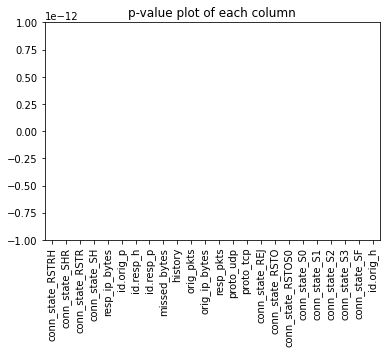

In [ ]:
plt.title('p-value plot of each column')
p_values.plot.bar()
plt.show()

In [ ]:
chi_values = pd.Series(chi_scores[0],index = X.columns)
chi_values.sort_values(ascending = False , inplace = True)

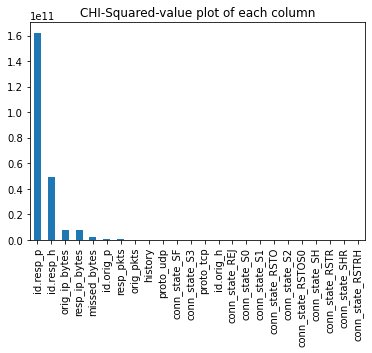

In [ ]:
plt.title('CHI-Squared-value plot of each column')
chi_values.plot.bar()
plt.show()

In [ ]:
feature_importance = list(chi_values[:5].index)
feature_importance

['id.resp_p', 'id.resp_h', 'orig_ip_bytes', 'resp_ip_bytes', 'missed_bytes']

In [ ]:
data.drop(['tunnel_parents'],axis=1, inplace=True)

In [ ]:
data.to_csv('IoT-23-trainable_data.csv')

In [ ]:
import shutil
shutil.move('/content/IoT-23-trainable_data.csv', '/content/drive/MyDrive')

'/content/drive/MyDrive/IoT-23-trainable_data.csv'

# PART-6: LOADING TRAINABLE DATASET:

- DATASET LOCATION-1

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/IoT-23-trainable_data.csv', index_col = 'uid')
data = data.iloc[:,1:]
data.head()


,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,detailed-label,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,68,3871516.0,67,0,6.0,16,9216,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,68,2836028.0,67,0,230.0,0,0,13,4264,Benign,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,5353,5879169.0,5353,0,6.0,11,979,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0


- DATASET LOCATION-2

In [ ]:
csvloc = '/content/drive/MyDrive/lakehead/IoT-23-trainable_data.csv'
data = pd.read_csv(csvloc, index_col = 'uid')
data = data.iloc[:,1:]
data.head()

,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,detailed-label,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,68,3871516.0,67,0,6.0,16,9216,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,68,2836028.0,67,0,230.0,0,0,13,4264,Benign,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,5353,5879169.0,5353,0,6.0,6,1164,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,5353,5879169.0,5353,0,6.0,11,979,0,0,Benign,0,1,0,0,0,0,0,1,0,0,0,0,0,0


# PART-7: MLP CLASSIFIER:

In [ ]:
data['detailed-label'].value_counts()

PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
C&C-FileDownload                   3
FileDownload                       3
Name: detailed-label, dtype: int64

In [ ]:
X = data.drop(['detailed-label'], axis=1)
y = data[['detailed-label']]

In [ ]:
X.head()

,id.orig_p,id.resp_h,id.resp_p,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_tcp,proto_udp,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
uid,,,,,,,,,,,,,,,,,,,,,,,
CUg3u41D8SwgQw1Job,68,3871516.0,67,0,6.0,16,9216,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CUpk9Y381SJuOHyK2d,68,2836028.0,67,0,230.0,0,0,13,4264,0,1,0,0,0,0,0,0,0,0,0,0,0,1
CC5CQA3Ptzma7a0by4,5353,5879169.0,5353,0,6.0,6,1164,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
C3sgcmfvNzjNoY0Kd,5353,5879169.0,5353,0,6.0,6,1164,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
CJVaCgoBTEsu0jjDi,5353,5879169.0,5353,0,6.0,11,979,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y.value_counts()

detailed-label           
PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
FileDownload                       3
C&C-FileDownload                   3
dtype: int64

In [ ]:
under = RandomUnderSampler(sampling_strategy={'PartOfAHorizontalPortScan':100000, 'Benign':100000}, random_state=2)
over = SMOTE(sampling_strategy={ 'C&C':100000,'DDoS':100000, 'Attack':100000, 'C&C-Torii':100000, 'FileDownload':100000,'C&C-FileDownload':100000 },k_neighbors=1, random_state=1)

steps = [('u', under),('o', over) ]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)


In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
y_test.columns = ['detailed-label']

In [ ]:
y_test.value_counts()

detailed-label           
PartOfAHorizontalPortScan    20000
FileDownload                 20000
DDoS                         20000
C&C-Torii                    20000
C&C-FileDownload             20000
C&C                          20000
Benign                       20000
Attack                       20000
dtype: int64

In [ ]:
y_train.value_counts()

detailed-label           
PartOfAHorizontalPortScan    80000
FileDownload                 80000
DDoS                         80000
C&C-Torii                    80000
C&C-FileDownload             80000
C&C                          80000
Benign                       80000
Attack                       80000
dtype: int64

MLP Tuning:

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter=15, random_state=1, early_stopping=True, n_iter_no_change=5, tol=0.0001, validation_fraction=0.1, epsilon=1e-08, solver = 'adam', verbose=1 )

parameter_grid = {
    'hidden_layer_sizes': [(10,30,10),(200,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV
MLP_search = GridSearchCV(MLP_classifier, parameter_grid, n_jobs=-1, cv=5)
MLP_search.fit(X_train, y_train) 


Iteration 1, loss = inf
Validation score: 0.769844
Iteration 2, loss = inf
Validation score: 0.719844
Iteration 3, loss = inf
Validation score: 0.876703
Iteration 4, loss = inf
Validation score: 0.885750
Iteration 5, loss = inf
Validation score: 0.880797
Iteration 6, loss = inf
Validation score: 0.760172
Iteration 7, loss = inf
Validation score: 0.930656
Iteration 8, loss = inf
Validation score: 0.924500
Iteration 9, loss = inf
Validation score: 0.917000
Iteration 10, loss = inf
Validation score: 0.892000
Iteration 11, loss = inf
Validation score: 0.934937
Iteration 12, loss = inf
Validation score: 0.949203
Iteration 13, loss = inf
Validation score: 0.945875
Iteration 14, loss = inf
Validation score: 0.875563
Iteration 15, loss = inf
Validation score: 0.937672
CPU times: user 2min 55s, sys: 1min 21s, total: 4min 16s
Wall time: 52min 35s


In [ ]:
MLP_search

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=True,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=15, momentum=0.9,
                                     n_iter_no_change=5,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=1,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation

In [ ]:
means = MLP_search.cv_results_['mean_test_score']
stds = MLP_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, MLP_search.cv_results_['params']):
    print("{0}% (+/-{1}%) for {2}".format(np.round(100*(mean), 2), np.round(100*std,2), params))


35.77% (+/-4.39%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant'}
35.77% (+/-4.39%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive'}
45.76% (+/-5.08%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}
45.76% (+/-5.08%) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}
36.12% (+/-8.77%) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant'}
36.12% (+/-8.77%) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive'}
44.51% (+/-4.67%) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}
44.51% (+/-4.67%) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}
87.45% (+/-5.07%

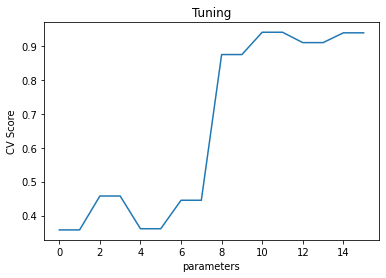

In [ ]:
plt.plot(means, label = 'CV_mean')
plt.xlabel('parameters')
plt.ylabel('CV Score')
plt.title('Tuning')
plt.show()

In [ ]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 

Tuned MLP:

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
Mlp_classifier = MLPClassifier(max_iter = 15, hidden_layer_sizes=(200,), learning_rate='adaptive', solver='adam', alpha=0.0001, activation='relu',verbose=1,
                               random_state=1, early_stopping=True, n_iter_no_change=5, tol=0.0001, validation_fraction=0.1, epsilon=1e-08 )
Mlp_classifier.fit(X_train, y_train)


Iteration 1, loss = inf
Validation score: 0.769844
Iteration 2, loss = inf
Validation score: 0.719844
Iteration 3, loss = inf
Validation score: 0.876703
Iteration 4, loss = inf
Validation score: 0.885750
Iteration 5, loss = inf
Validation score: 0.880797
Iteration 6, loss = inf
Validation score: 0.760172
Iteration 7, loss = inf
Validation score: 0.930656
Iteration 8, loss = inf
Validation score: 0.924500
Iteration 9, loss = inf
Validation score: 0.917000
Iteration 10, loss = inf
Validation score: 0.892000
Iteration 11, loss = inf
Validation score: 0.934937
Iteration 12, loss = inf
Validation score: 0.949203
Iteration 13, loss = inf
Validation score: 0.945875
Iteration 14, loss = inf
Validation score: 0.875563
Iteration 15, loss = inf
Validation score: 0.937672
CPU times: user 3min, sys: 1min 26s, total: 4min 27s
Wall time: 2min 20s


In [ ]:
# Train predictions
train_pred = Mlp_classifier.score(X_train,y_train)

In [ ]:
# Prediction on unknown Test data
y_pred=Mlp_classifier.predict(X_test)

In [ ]:

print('MLP Classifier Training accuracy score:',100*train_pred.round(2),'%')
test_accuracy = 100*(metrics.accuracy_score(y_test, y_pred).round(2))
print('MLP Classifier Test Accuracy Score:',test_accuracy,'%')

scores = cross_val_score(Mlp_classifier, cv=5, scoring='accuracy', X = X_train, y=y_train)
print('MLP Cross Validation Accuracy:', 100*(np.mean(scores)).round(2),'%')


MLP Classifier Training accuracy score: 95.0 %
MLP Classifier Test Accuracy Score: 95.0 %
Iteration 1, loss = inf
Validation score: 0.706621
Iteration 2, loss = inf
Validation score: 0.815801
Iteration 3, loss = inf
Validation score: 0.848320
Iteration 4, loss = inf
Validation score: 0.665566
Iteration 5, loss = inf
Validation score: 0.872422
Iteration 6, loss = inf
Validation score: 0.816992
Iteration 7, loss = inf
Validation score: 0.926660
Iteration 8, loss = inf
Validation score: 0.919961
Iteration 9, loss = inf
Validation score: 0.859961
Iteration 10, loss = inf
Validation score: 0.894746
Iteration 11, loss = inf
Validation score: 0.933984
Iteration 12, loss = inf
Validation score: 0.941680
Iteration 13, loss = inf
Validation score: 0.874355
Iteration 14, loss = inf
Validation score: 0.911875
Iteration 15, loss = inf
Validation score: 0.840059
Iteration 1, loss = inf
Validation score: 0.774336
Iteration 2, loss = inf
Validation score: 0.740488
Iteration 3, loss = inf
Validation sc

In [ ]:
# classification report
print('Classification Report')
print(metrics.classification_report(y_test,y_pred))

print('Confusion Matrix')
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)


Classification Report
                           precision    recall  f1-score   support

                   Attack       0.99      1.00      0.99     20000
                   Benign       0.97      0.84      0.90     20000
                      C&C       0.85      1.00      0.92     20000
         C&C-FileDownload       1.00      1.00      1.00     20000
                C&C-Torii       0.97      1.00      0.98     20000
                     DDoS       0.99      0.99      0.99     20000
             FileDownload       1.00      1.00      1.00     20000
PartOfAHorizontalPortScan       0.85      0.77      0.81     20000

                 accuracy                           0.95    160000
                macro avg       0.95      0.95      0.95    160000
             weighted avg       0.95      0.95      0.95    160000

Confusion Matrix
[[19981     0    13     0     0     0     0     6]
 [   91 16864   516     0    50     0     1  2478]
 [    6     3 19982     0     0     0     0     9]
 

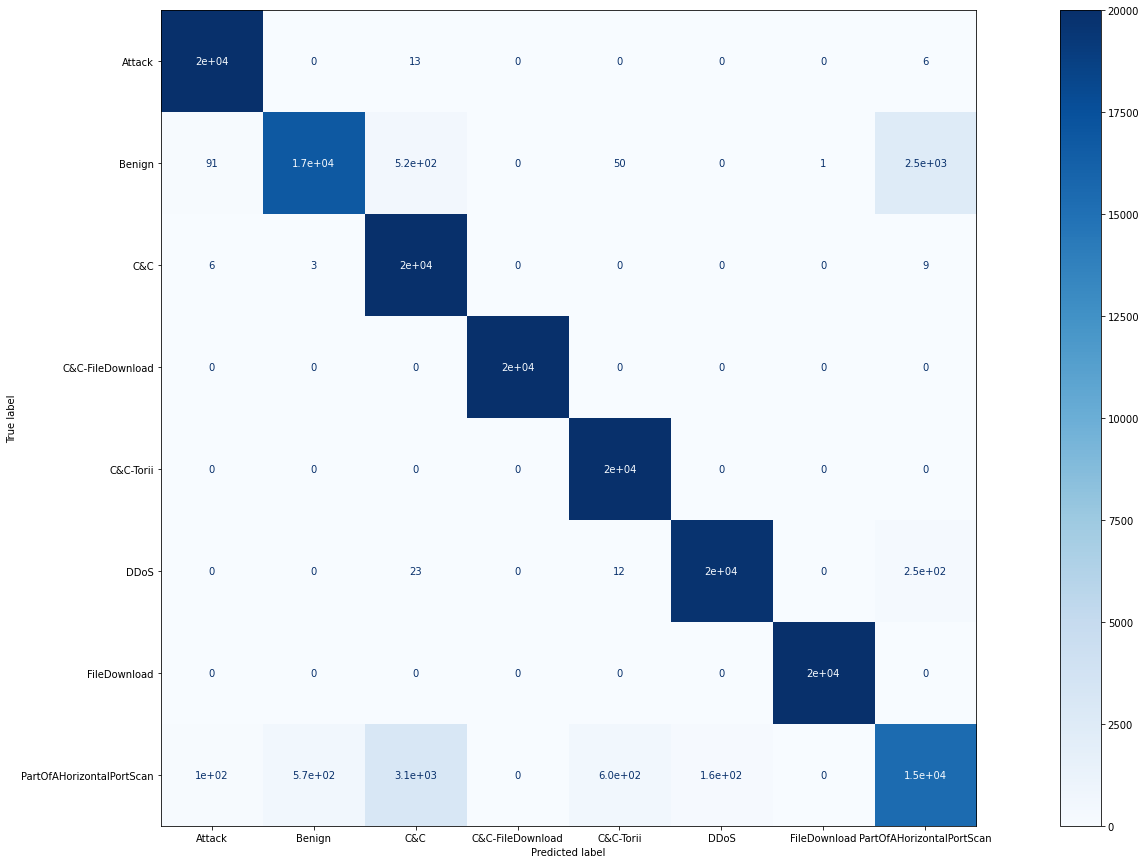

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(30, 15))
plot_confusion_matrix(Mlp_classifier,X_test,y_test, ax=ax, cmap=plt.cm.Blues)
plt.show()



In [ ]:

test_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
test_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
test_f1_score = metrics.f1_score(y_test, y_pred, average = 'macro')

In [ ]:
# Results DataFrame
MLP_results = pd.DataFrame({'Test Accuracy(%)': test_accuracy, 'Train Accuracy(%)':100*train_pred.round(2), '5 Fold CV score (%)': 100*(np.mean(scores)).round(2), 
              'Test Recall': test_recall, 'Test F1 Score': test_f1_score, 'Test Precision': test_precision},index=[0])

MLP_results

,Test Accuracy(%),Train Accuracy(%),5 Fold CV score (%),Test Recall,Test F1 Score,Test Precision
0,95.0,95.0,94.0,0.949963,0.949087,0.951397


# PART-8: CNN-CLASSIFIER:

In [ ]:
data['detailed-label'].value_counts()

PartOfAHorizontalPortScan    7040929
Benign                        513304
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
C&C-FileDownload                   3
FileDownload                       3
Name: detailed-label, dtype: int64

In [ ]:
X = data.drop(['detailed-label'], axis=1)
y_first = data[['detailed-label']]

In [ ]:
under = RandomUnderSampler(sampling_strategy={'PartOfAHorizontalPortScan':100000, 'Benign':100000}, random_state=2)
over = SMOTE(sampling_strategy={ 'C&C':100000,'DDoS':100000, 'Attack':100000, 'C&C-Torii':100000, 'FileDownload':100000,'C&C-FileDownload':100000 }, k_neighbors=1, random_state=1)

steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y_first = pipeline.fit_resample(X, y_first)


FIT

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_first)
encoded_Y = encoder.transform(y_first)
dummy_y = np_utils.to_categorical(encoded_Y)
y = dummy_y


In [ ]:
decode = pd.DataFrame(encoded_Y, y_first).reset_index()
decode.value_counts()

index                      0
PartOfAHorizontalPortScan  7    100000
FileDownload               6    100000
DDoS                       5    100000
C&C-Torii                  4    100000
C&C-FileDownload           3    100000
C&C                        2    100000
Benign                     1    100000
Attack                     0    100000
dtype: int64

In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
# y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
# y_test.columns = ['detailed-label']

In [ ]:
y_test.value_counts()

0    1    2    3    4    5    6    7  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    20000
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    20000
     0.0  1.0  0.0  0.0  0.0  0.0  0.0    20000
          0.0  1.0  0.0  0.0  0.0  0.0    20000
               0.0  1.0  0.0  0.0  0.0    20000
                    0.0  1.0  0.0  0.0    20000
                         0.0  1.0  0.0    20000
                              0.0  1.0    20000
dtype: int64

In [ ]:
y_train.value_counts()

0    1    2    3    4    5    6    7  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    80000
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    80000
     0.0  1.0  0.0  0.0  0.0  0.0  0.0    80000
          0.0  1.0  0.0  0.0  0.0  0.0    80000
               0.0  1.0  0.0  0.0  0.0    80000
                    0.0  1.0  0.0  0.0    80000
                         0.0  1.0  0.0    80000
                              0.0  1.0    80000
dtype: int64

CNN

In [ ]:
x_train = X_train.to_numpy()
x_test  = X_test.to_numpy()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 23)
(160000, 23)
(640000, 8)
(160000, 8)


In [ ]:
x_train=x_train.reshape(640000, 23, 1) # make sure above listed size matches
x_test=x_test.reshape(160000, 23, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 23, 1)
(160000, 23, 1)
(640000, 8)
(160000, 8)


checkpoint saving:

In [ ]:

# Name of model with current date and its metrics
model_name = 'model_init' + '_' + str(datetime.now()).replace(' ','').replace(':','_') + '/'

# making directory for model 
if not os.path.exists(model_name):
    os.mkdir(model_name)

# filepath for model to save.      
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.h5'

# Checkpoint to save model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)


callbacks_list = [checkpoint]

In [ ]:

model=Sequential()
model.add(Conv1D(16,(2),activation='relu', input_shape = x_train[0].shape))
model.add(MaxPool1D(1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,(2),activation='relu'))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8,activation='sigmoid'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=callbacks_list)

Epoch 1/100
20000/20000 [==============================] - 87s 4ms/step - loss: 1.2365 - accuracy: 0.4501 - val_loss: 1.4640 - val_accuracy: 0.5548

Epoch 00001: saving model to model_init_2021-03-1809_46_32.649192/model-00001-1.05247-0.53167-1.46402-0.55480.h5
Epoch 2/100
20000/20000 [==============================] - 87s 4ms/step - loss: 0.7613 - accuracy: 0.6937 - val_loss: 1.0458 - val_accuracy: 0.8719

Epoch 00002: saving model to model_init_2021-03-1809_46_32.649192/model-00002-0.74235-0.70392-1.04582-0.87195.h5
Epoch 3/100
20000/20000 [==============================] - 84s 4ms/step - loss: 0.7072 - accuracy: 0.7209 - val_loss: 1.3295 - val_accuracy: 0.7421

Epoch 00003: saving model to model_init_2021-03-1809_46_32.649192/model-00003-0.70071-0.72390-1.32950-0.74206.h5
Epoch 4/100
20000/20000 [==============================] - 80s 4ms/step - loss: 0.6856 - accuracy: 0.7309 - val_loss: 1.6954 - val_accuracy: 0.7575

Epoch 00004: saving model to model_init_2021-03-1809_46_32.649192

Graphs

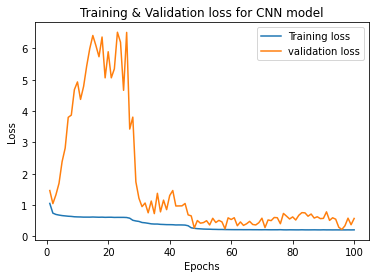

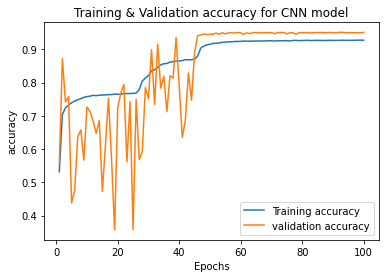

In [ ]:
history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 101) 
plt.plot(epochs, loss_values, label = "Training loss") 
plt.plot(epochs, val_loss, label = "validation loss") 
plt.title('Training & Validation loss for CNN model') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()


loss_values = history_dict['accuracy']
val_loss = history_dict['val_accuracy']
epochs = range(1, 101) 
plt.plot(epochs, loss_values, label = "Training accuracy") 
plt.plot(epochs, val_loss, label = "validation accuracy")
plt.title('Training & Validation accuracy for CNN model') 
plt.xlabel('Epochs') 
plt.ylabel('accuracy') 
plt.legend()
plt.show()


Saving Model to Disk:

In [ ]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("balanced_final_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("balanced_final_model.h5")
print("Saved model to disk")

Saved model to disk


 Loading Model From Disk:

In [ ]:
# load YAML and create model
yaml_file = open('balanced_final_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("balanced_final_model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
5000/5000 [==============================] - 10s 2ms/step - loss: 1.3557 - accuracy: 0.9435
accuracy: 94.43%


Model Evaluation

In [ ]:
y_test_pred = pd.DataFrame(loaded_model.predict(x_test))

In [ ]:
test_pred = loaded_model.predict(x_test) 

test_pred = pd.DataFrame(np.argmax(test_pred, axis=1))
test_label =  pd.DataFrame(np.argmax(np.array(y_test),axis = 1))


In [ ]:
# Decoding predicted test labels back from label encoded values.
test_pred.loc[test_pred[0]==7,0]= 'PartOfAHorizontalPortScan'
test_pred.loc[test_pred[0]==1,0]= 'Benign'
test_pred.loc[test_pred[0]==2,0]= 'C&C'
test_pred.loc[test_pred[0]==5,0]= 'DDoS'
test_pred.loc[test_pred[0]==0,0]= 'Attack'
test_pred.loc[test_pred[0]==4,0]= 'C&C-Torii'
test_pred.loc[test_pred[0]==3,0]= 'C&C-FileDownload'
test_pred.loc[test_pred[0]==6,0]= 'FileDownload'

# Decoding Actual test labels back from label encoded values.
test_label.loc[test_label[0]==7,0]= 'PartOfAHorizontalPortScan'
test_label.loc[test_label[0]==1,0]= 'Benign'
test_label.loc[test_label[0]==2,0]= 'C&C'
test_label.loc[test_label[0]==5,0]= 'DDoS'
test_label.loc[test_label[0]==0,0]= 'Attack'
test_label.loc[test_label[0]==4,0]= 'C&C-Torii'
test_label.loc[test_label[0]==3,0]= 'C&C-FileDownload'
test_label.loc[test_label[0]==6,0]= 'FileDownload'


In [ ]:

test_accuracy = metrics.accuracy_score(test_label, test_pred)
print('Train Accuracy:')
print(round(100*score[1],2))
print('Test Accuracy:')
print(100*test_accuracy.round(2))


Train Accuracy:
94.43
Test Accuracy:
94.0


In [ ]:
cm = metrics.confusion_matrix(test_label, test_pred)
cm

array([[20000,     0,     0,     0,     0,     0,     0,     0],
       [   32, 19354,   372,     0,   154,     0,     1,    87],
       [    0,    11, 19983,     0,     4,     0,     0,     2],
       [    0,     0,     0, 20000,     0,     0,     0,     0],
       [    0,     6,     0,     0, 19994,     0,     0,     0],
       [    2,     0,     0,     0,     0, 19833,     0,   165],
       [    0,     0,     0,     0,     0,     0, 20000,     0],
       [   17,   139,  7679,     1,   234,     0,     0, 11930]])

In [ ]:
test_pred.value_counts()

C&C                          28034
C&C-Torii                    20386
Attack                       20051
FileDownload                 20001
C&C-FileDownload             20001
DDoS                         19833
Benign                       19510
PartOfAHorizontalPortScan    12184
dtype: int64

In [ ]:
test_label.value_counts()

PartOfAHorizontalPortScan    20000
FileDownload                 20000
DDoS                         20000
C&C-Torii                    20000
C&C-FileDownload             20000
C&C                          20000
Benign                       20000
Attack                       20000
dtype: int64

Confusion matrix, without normalization


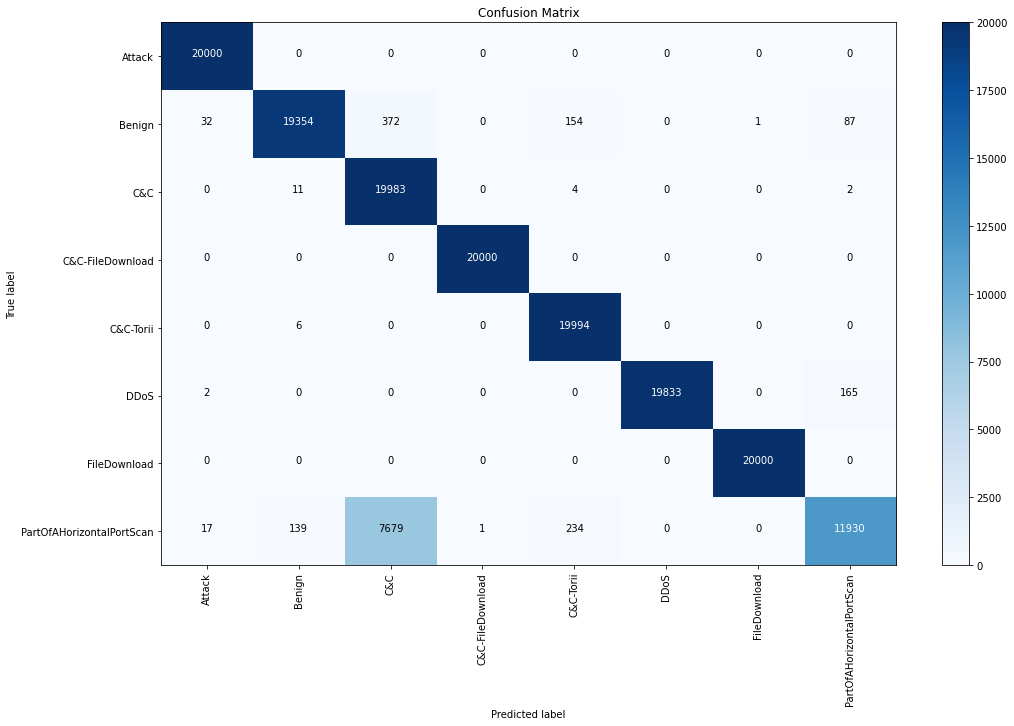

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm=cm, classes=['Attack','Benign','C&C', 'C&C-FileDownload','C&C-Torii','DDoS','FileDownload','PartOfAHorizontalPortScan'], title='Confusion Matrix')

In [ ]:
print(metrics.classification_report(test_label, test_pred))

                           precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00     20000
                   Benign       0.99      0.97      0.98     20000
                      C&C       0.71      1.00      0.83     20000
         C&C-FileDownload       1.00      1.00      1.00     20000
                C&C-Torii       0.98      1.00      0.99     20000
                     DDoS       1.00      0.99      1.00     20000
             FileDownload       1.00      1.00      1.00     20000
PartOfAHorizontalPortScan       0.98      0.60      0.74     20000

                 accuracy                           0.94    160000
                macro avg       0.96      0.94      0.94    160000
             weighted avg       0.96      0.94      0.94    160000



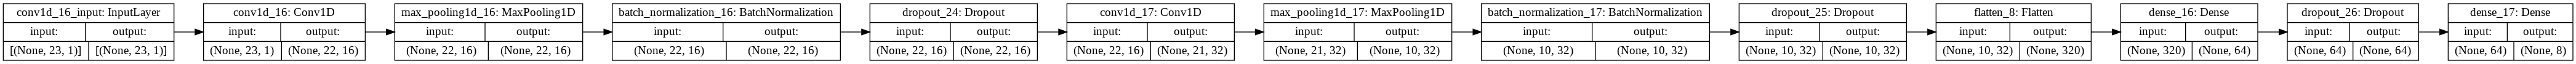

In [ ]:
import keras
keras.utils.plot_model(loaded_model, show_shapes=True, rankdir='LR')


In [ ]:
test_accuracy  =  metrics.accuracy_score(test_label, test_pred)
test_precision = metrics.precision_score(test_label, test_pred, average = 'macro')
test_recall = metrics.recall_score(test_label, test_pred, average = 'macro')
test_f1_score = metrics.f1_score(test_label, test_pred, average = 'macro')

In [ ]:
# Results DataFrame
CNN_results = pd.DataFrame({'Test Accuracy(%)': round(test_accuracy*100,2),  
              'Test Recall': test_recall, 'Test F1 Score': test_f1_score, 'Test Precision': test_precision},index=[0])

CNN_results

,Test Accuracy(%),Test Recall,Test F1 Score,Test Precision
0,94.43,0.944338,0.942216,0.957762


# PART-9: LSTM CLASSIFIER:

In [ ]:
X = data.drop(['detailed-label'], axis=1)
y_first = data[['detailed-label']]

In [ ]:
under = RandomUnderSampler(sampling_strategy={'PartOfAHorizontalPortScan':100000, 'Benign':100000}, random_state=2)
over = SMOTE(sampling_strategy={ 'C&C':100000,'DDoS':100000, 'Attack':100000, 'C&C-Torii':100000, 'FileDownload':100000,'C&C-FileDownload':100000 }, k_neighbors=1, random_state=1)

steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y_first = pipeline.fit_resample(X, y_first)


FIT

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_first)
encoded_Y = encoder.transform(y_first)
dummy_y = np_utils.to_categorical(encoded_Y)
y = dummy_y


In [ ]:
decode = pd.DataFrame(encoded_Y, y_first).reset_index()
decode.value_counts()

index                      0
PartOfAHorizontalPortScan  7    100000
FileDownload               6    100000
DDoS                       5    100000
C&C-Torii                  4    100000
C&C-FileDownload           3    100000
C&C                        2    100000
Benign                     1    100000
Attack                     0    100000
dtype: int64

In [ ]:
# Train-Test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=1)
X_train = pd.DataFrame(X_train)
X_train.columns =data.drop(['detailed-label'], axis=1).columns
X_test = pd.DataFrame(X_test)
X_test.columns =data.drop(['detailed-label'], axis=1).columns
y_train = pd.DataFrame(y_train)
# y_train.columns = ['detailed-label']
y_test = pd.DataFrame(y_test)
# y_test.columns = ['detailed-label']

In [ ]:
# Original shape of Training and Testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((640000, 23), (160000, 23), (640000, 8), (160000, 8))

In [ ]:
# Reshaping to required shapes for LSTM  Model Training
X_train_mini = np.array(X_train).reshape(640000, 1, 23)
X_test_mini = np.array(X_test).reshape(160000,1,23)
y_train_mini = np.array(y_train).reshape (640000,8)
y_test_mini = np.array(y_test).reshape (160000,8)


In [ ]:
# Reshaped size
X_train_mini.shape

(640000, 1, 23)

In [ ]:
# Code for Model Checkpoint save.
# importing datetime, os, checkpoint, reducelronplateau libraries.
from datetime import datetime
import os
from keras.callbacks import ModelCheckpoint

# Name of model with current date and its metrics
model_name = 'model_init' + '_' + str(datetime.now()).replace(' ','').replace(':','_') + '/'

# making directory for model 
if not os.path.exists(model_name):
    os.mkdir(model_name)

# filepath for model to save.      
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.h5'

# Checkpoint to save model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

# reduce learning rate when it stagnates
#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=4) 
callbacks_list = [checkpoint]

In [ ]:
# LSTM Network

# number of input features
input_dim = X_train_mini.shape[2]

# Initializing sequential model
model_lstm =Sequential()
# 100 LSTM units Layer
model_lstm.add(LSTM(100, activation='relu'))
# Dense output layer.
model_lstm.add(Dense(8, input_shape = (X_train_mini[0],1) , input_dim=input_dim, activation='softmax'))
# Compiling the above neural network with adam optimizer, accuracy and loss metrics
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [ ]:
%%time
# Fitting the LSTM network on the data
history = model_lstm.fit(X_train_mini, y_train_mini, epochs=400, batch_size=10000, validation_data=(X_test_mini, y_test_mini) , verbose=1, callbacks= callbacks_list)

Epoch 1/400
64/64 [==============================] - 10s 128ms/step - loss: 49573.1746 - accuracy: 0.1979 - val_loss: 911.1901 - val_accuracy: 0.5027

Epoch 00001: saving model to model_init_2021-03-1805_42_44.940890/model-00001-21242.66016-0.31590-911.19012-0.50271.h5
Epoch 2/400
64/64 [==============================] - 8s 119ms/step - loss: 727.5950 - accuracy: 0.5529 - val_loss: 829.8543 - val_accuracy: 0.5930

Epoch 00002: saving model to model_init_2021-03-1805_42_44.940890/model-00002-696.06927-0.57534-829.85431-0.59301.h5
Epoch 3/400
64/64 [==============================] - 8s 119ms/step - loss: 534.4927 - accuracy: 0.6082 - val_loss: 1254.3625 - val_accuracy: 0.5530

Epoch 00003: saving model to model_init_2021-03-1805_42_44.940890/model-00003-522.12793-0.61412-1254.36255-0.55297.h5
Epoch 4/400
64/64 [==============================] - 8s 119ms/step - loss: 916.8945 - accuracy: 0.5756 - val_loss: 1110.9276 - val_accuracy: 0.5885

Epoch 00004: saving model to model_init_2021-03-1

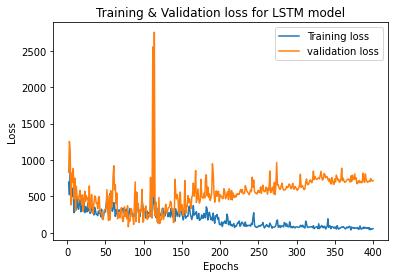

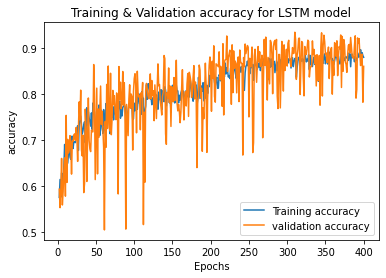

In [ ]:
# Loss plot for LSTM network
history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss'][1:]
val_loss = history_dict['val_loss'][1:]
epochs = range(2, 401) 
plt.plot(epochs, loss_values, label = "Training loss") 
plt.plot(epochs, val_loss, label = "validation loss") 
plt.title('Training & Validation loss for LSTM model') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

# accuracy plot for LSTM Network
loss_values = history_dict['accuracy'][1:]
val_loss = history_dict['val_accuracy'][1:]
epochs = range(2, 401) 
plt.plot(epochs, loss_values, label = "Training accuracy") 
plt.plot(epochs, val_loss, label = "validation accuracy")
plt.title('Training & Validation accuracy for LSTM model') 
plt.xlabel('Epochs') 
plt.ylabel('accuracy') 
plt.legend()
plt.show()


In [ ]:
max(history_dict['val_accuracy'])

0.9334499835968018

In [ ]:
# load  into new model
LSTM_model = load_model("/content/model-00310-71.59982-0.87613-591.63696-0.93345.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = LSTM_model.evaluate(X_test_mini, y_test_mini, verbose=1)
print("%s: %.2f%%" % (LSTM_model.metrics_names[1], score[1]*100))

Loaded model from disk
5000/5000 [==============================] - 7s 1ms/step - loss: 297.3194 - accuracy: 0.9333
accuracy: 93.34%


In [ ]:
# Predict probabilities of attack labels on test data
y_pred_LSTM_test = pd.DataFrame(LSTM_model.predict(X_test_mini).argmax(axis=1))
y_actual_test = pd.DataFrame(y_test_mini.argmax(axis=1))

# Decoding predicted test labels back from label encoded values.
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==7,0]= 'PartOfAHorizontalPortScan'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==1,0]= 'Benign'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==2,0]= 'C&C'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==5,0]= 'DDoS'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==0,0]= 'Attack'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==4,0]= 'C&C-Torii'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==3,0]= 'C&C-FileDownload'
y_pred_LSTM_test.loc[y_pred_LSTM_test[0]==6,0]= 'FileDownload'

# Decoding Actual test labels back from label encoded values.
y_actual_test.loc[y_actual_test[0]==7,0]= 'PartOfAHorizontalPortScan'
y_actual_test.loc[y_actual_test[0]==1,0]= 'Benign'
y_actual_test.loc[y_actual_test[0]==2,0]= 'C&C'
y_actual_test.loc[y_actual_test[0]==5,0]= 'DDoS'
y_actual_test.loc[y_actual_test[0]==0,0]= 'Attack'
y_actual_test.loc[y_actual_test[0]==4,0]= 'C&C-Torii'
y_actual_test.loc[y_actual_test[0]==3,0]= 'C&C-FileDownload'
y_actual_test.loc[y_actual_test[0]==6,0]= 'FileDownload'


In [ ]:
# COnfusion Matrix
cm = metrics.confusion_matrix(y_pred_LSTM_test, y_actual_test)
cm

array([[19875,    41,     4,     0,     0,     0,     0,    30],
       [    1, 17412,     3,     0,     0,     0,     0,   547],
       [   52,   855, 19991,     0,     0,    38,     0,  5530],
       [    0,     1,     0, 20000,     0,     0,     0,     0],
       [   14,   149,     2,     0, 20000,    20,     0,  1543],
       [    0,     1,     0,     0,     0, 19757,     0,    33],
       [    0,     0,     0,     0,     0,     0, 20000,     0],
       [   58,  1541,     0,     0,     0,   185,     0, 12317]])

Confusion matrix, without normalization


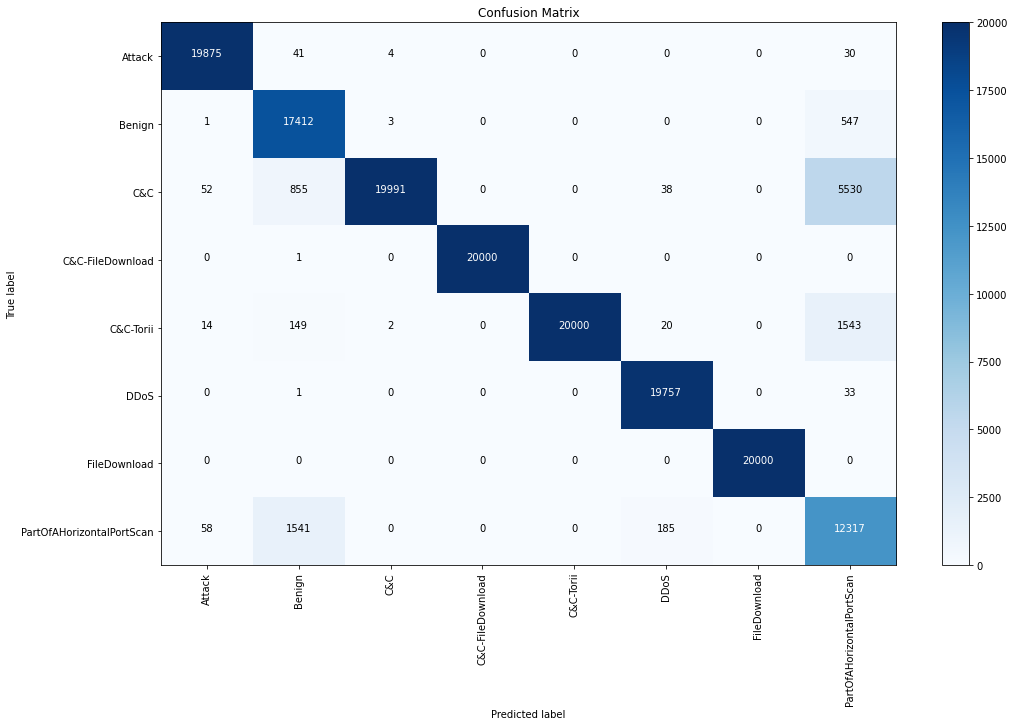

In [ ]:
# Plot for confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap= plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm=cm, classes=['Attack','Benign','C&C', 'C&C-FileDownload','C&C-Torii','DDoS','FileDownload','PartOfAHorizontalPortScan'], title='Confusion Matrix')

In [ ]:
# Classification report.
print(metrics.classification_report(y_actual_test, y_pred_LSTM_test))

                           precision    recall  f1-score   support

                   Attack       1.00      0.99      0.99     20000
                   Benign       0.97      0.87      0.92     20000
                      C&C       0.76      1.00      0.86     20000
         C&C-FileDownload       1.00      1.00      1.00     20000
                C&C-Torii       0.92      1.00      0.96     20000
                     DDoS       1.00      0.99      0.99     20000
             FileDownload       1.00      1.00      1.00     20000
PartOfAHorizontalPortScan       0.87      0.62      0.72     20000

                 accuracy                           0.93    160000
                macro avg       0.94      0.93      0.93    160000
             weighted avg       0.94      0.93      0.93    160000



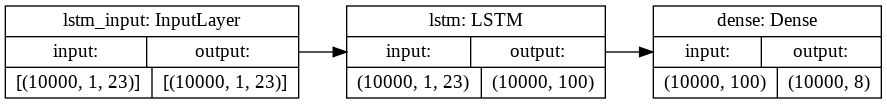

In [ ]:
# Structure of LSTM network
import keras
keras.utils.plot_model(LSTM_model, show_shapes=True, rankdir='LR')


In [ ]:
test_accuracy  =  metrics.accuracy_score(y_actual_test, y_pred_LSTM_test)
test_precision = metrics.precision_score(y_actual_test, y_pred_LSTM_test, average = 'macro')
test_recall = metrics.recall_score(y_actual_test, y_pred_LSTM_test, average = 'macro')
test_f1_score = metrics.f1_score(y_actual_test, y_pred_LSTM_test, average = 'macro')

In [ ]:
# Results DataFrame
LSTM_results = pd.DataFrame({'Test Accuracy(%)': round(test_accuracy*100,2),  
              'Test Recall': test_recall, 'Test F1 Score': test_f1_score, 'Test Precision': test_precision},index=[0])

LSTM_results

,Test Accuracy(%),Test Recall,Test F1 Score,Test Precision
0,93.34,0.93345,0.930844,0.939138


# PART-10: COMPARISION OF MLP, CNN, LSTM:

In [ ]:
results = pd.concat([MLP_results[LSTM_results.columns], CNN_results, LSTM_results]).reset_index(drop=True)
results.insert(0, 'Model',  ['MLP', 'CNN', 'LSTM'])
results

,Model,Test Accuracy(%),Test Recall,Test F1 Score,Test Precision
0,MLP,95.00,0.949963,0.949087,0.951397
1,CNN,94.43,0.944338,0.942216,0.957762
2,LSTM,93.34,0.933450,0.930844,0.939138


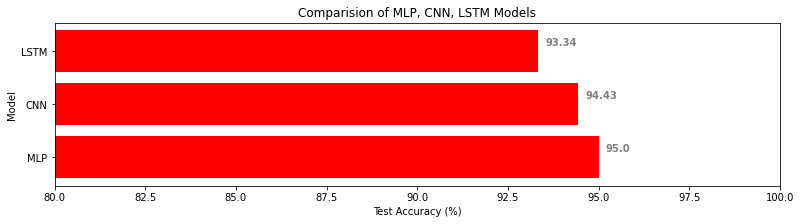

In [ ]:
fig, ax = plt.subplots(figsize =(13, 3))
ax.barh(results['Model'], results['Test Accuracy(%)'],color = 'r' )
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
plt.xlim(80,100)
# setting label of y-axis
plt.ylabel("Model") 
# setting label of x-axis
plt.xlabel("Test Accuracy (%)") 
plt.title("Comparision of MLP, CNN, LSTM Models")
plt.show()

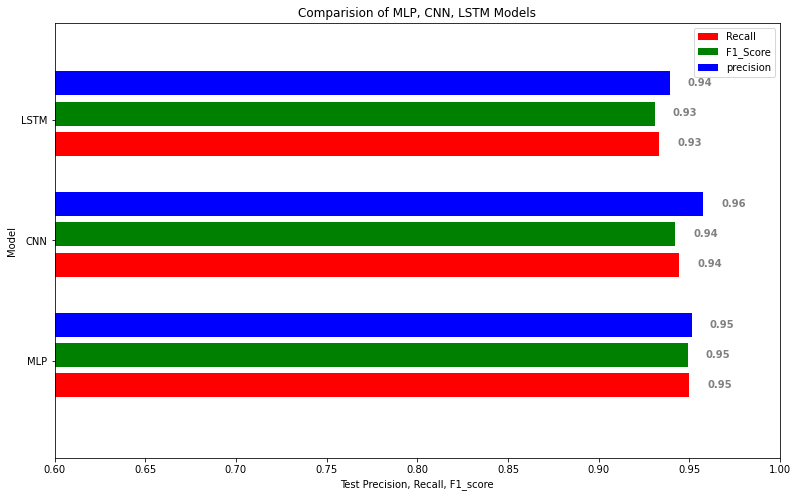

In [ ]:
ind = np.arange(len(results))
width = 0.2

fig, ax = plt.subplots(figsize=(13, 8))
ax.barh(ind, results['Test Recall'], width, color='red', label='Recall')
ax.barh(ind + width+0.05, results['Test F1 Score'], width, color='green', label='F1_Score')
ax.barh(ind + 2*width+0.1, results['Test Precision'], width, color='b', label='precision')
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.08,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set(yticks=ind + width, yticklabels=results['Model'], ylim=[2*width - 1, len(results)])
ax.legend()
plt.xlim(0.6,1)
plt.ylabel("Model") 
# setting label of x-axis
plt.xlabel("Test Precision, Recall, F1_score") 
plt.title("Comparision of MLP, CNN, LSTM Models")
plt.show()



# END OF NOTEBOOK